In [16]:
import numpy as np

import librosa as lr

from kymatio_audio import scattering_audio_distance as sad

from IPython import display as ipd
plt.rcParams['figure.figsize'] = [6, 3]

In [17]:
pathAudio = 'audio'
files = lr.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
audio = []

files = ['i', 'SmallCapI', 'e', 'Epsilon', 'ScriptA', 'BackwardScriptA', 'OpenO', 'o', 'u'] # , 'ae'
   
for y in files: 
    data, sr = lr.load('audio/speech/'+y+'.wav', sr = 22050,mono = True)   
    audio.append(data)

a = np.hstack(audio)
import scipy.io.wavfile
scipy.io.wavfile.write('demo/vowel.wav', sr, a)

ipd.Audio(a, rate=sr)


In [18]:
from pathlib import Path

labels = []
for f in files:
    labels.append(Path(f).stem)

In [19]:
mss_distances = sad.multiscale_audio_distance(audio, sr)

Max num samples 13388
Max duration 0.6071655328798186 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


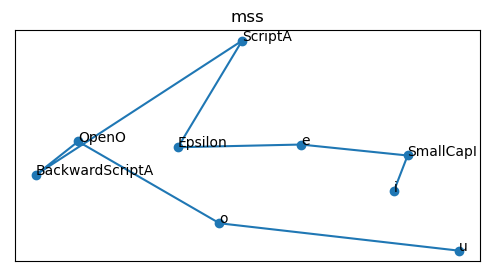

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

def plot_dist(distances, dist_type):
    emb = MDS(n_components=2, dissimilarity='precomputed', random_state=0).fit_transform(distances)
    plt.scatter(emb[:, 0], emb[:, 1])
    plt.plot(emb[:, 0], emb[:, 1])
    for l_i, l in enumerate(labels):
        plt.text(emb[l_i, 0], emb[l_i, 1], l)
    plt.title(dist_type)
    plt.xticks([]),plt.yticks([])
    plt.savefig('demo/vowel_'+dist_type+'.png')
    plt.show()

plot_dist(mss_distances, 'mss')

In [21]:
scattering_distances = sad.scattering_audio_distance(audio, sr)

Max num samples 13388
Max duration 0.6071655328798186 seconds.
Time support: 0.7430385487528345 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


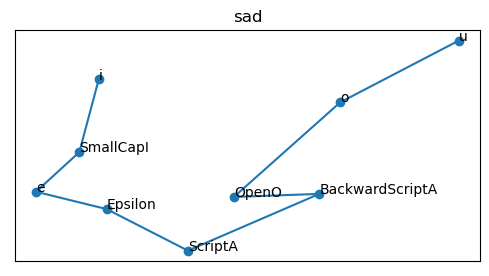

In [22]:
plot_dist(scattering_distances, 'sad')